# Model selection and Curse of Dimensionality
- Validation
- k-Fold Cross Validation
- Leave-one-out cross-validation
- Curse of Dimensionality


#### Load Iris dataset
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant
- Iris Setosa
- Iris Versicolour
- Iris Virginica

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

print(X.shape) # sepal length, width, petal length and width in cm
print(y.shape)

(150, 4)
(150,)


In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

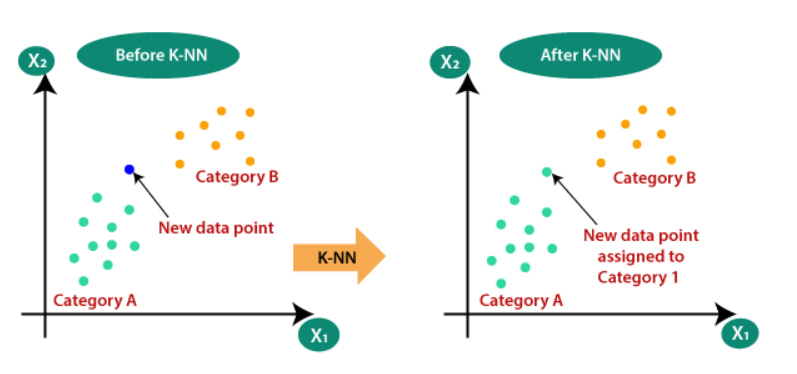

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

from IPython.display import Image
Image(filename='K-NN.png') # Image is taken from https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

# Validation
Hold out set is important to test the model's performance

In [4]:
from sklearn.model_selection import train_test_split # split the data into 60% training and 40% validation

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.6)

# fit the model on the training data
model.fit(X_train, y_train)

# evaluate the model on the validation data
y_val_predicted = model.predict(X_val)
y_val_predicted

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2])

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_predicted)# The hold-out set is similar to unknown data, because the model has not "seen" it before.

0.9166666666666666

# k-fold Cross Validation

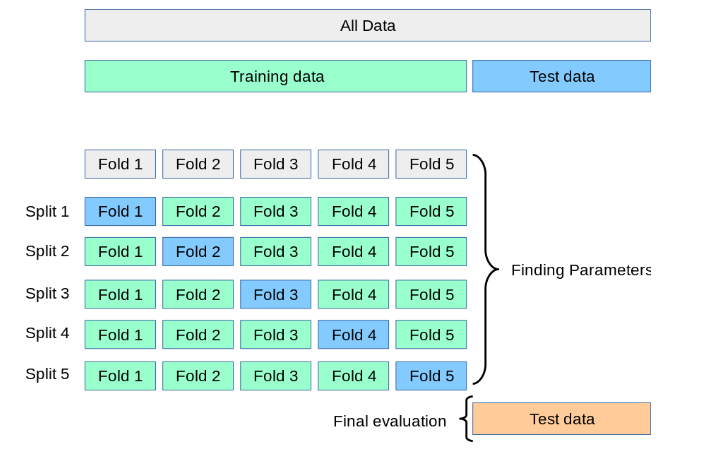

In [6]:
Image(filename='K-Fold_fig.png') # Image is taken from https://scikit-learn.org/stable/modules/cross_validation.html

In [7]:
from sklearn.model_selection import cross_val_score
K = 5
cross_val_score(model, X, y, cv=K)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

# Model validation using leave One Out Validation
It is a special case of cross-validation where the number of folds equals the number of instances in the data set.

In [8]:
import numpy as np
L = len(np.unique(y))
conf_matrix = np.zeros((L,L))
conf_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [9]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)

150

In [10]:
for train_index, val_index in loo.split(X):
#    print(test_index)
   X_train, X_val = X[train_index], X[val_index]
   y_train, y_val = y[train_index], y[val_index]
   model.fit(X_train, y_train)
   y_val_predicted = model.predict(X_val)
   conf_matrix[y_val,y_val_predicted] +=1

In [11]:
conf_matrix

array([[50.,  0.,  0.],
       [ 0., 47.,  3.],
       [ 0.,  3., 47.]])

In [12]:
TP = sum(conf_matrix[i][i] for i in range(L))
TP

144.0

In [13]:
accuracy = TP/len(y)
accuracy

0.96

# Curse of Dimensionality

Text(0.5, 1.0, '1D')

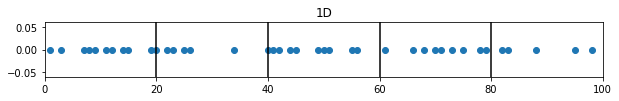

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from mpl_toolkits import mplot3d

L = 40 # Length of data
x = random.sample(range(0, 100), L)
y = [0 for x_val in x]


fig, ax = plt.subplots(figsize=(10,1))
plt.scatter(x, y)
# Grid lines
for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='k')
    
ax.set_xlim((0,100))
plt.title("1D")


Text(0.5, 1.0, '2D')

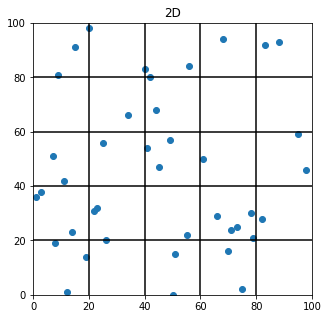

In [17]:
y = random.sample(range(0, 100), L) 

fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x, y)
# Grid lines
for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='k')
    plt.axhline(y=grid_pt, color='k')
    
ax.set_xlim((0,100))
ax.set_ylim((0,100))
plt.title("2D")

Text(0.5, 0.92, '3D')

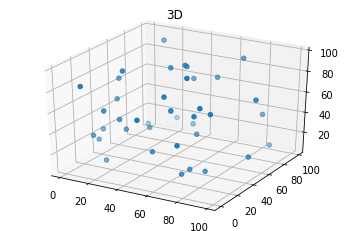

In [18]:
# x = random.sample(range(0, 100), L) 
# y = random.sample(range(0, 100), L) 
z = random.sample(range(0, 100), L)

fig = plt.figure()
ax  = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(x, y, z)
plt.title("3D")
